In [31]:
import requests
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import plotnine as p9
import seaborn as sns

In [4]:
# Request hesitancy data
hesitancy_endpoint = 'https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=4000'
r = requests.get(hesitancy_endpoint)
hesitancy_df = pd.DataFrame(r.json())
hesitancy_df.head()

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0036,0.2697,0,0.6887,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.235,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0061,0.3237,0.0003,0.6263,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0003,0.6938,0,0.2684,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0025,0.2354,0,0.6495,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.7,High Vulnerability,0.8,High Concern,...,0.0016,0.0073,0.0005,0.937,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94


In [5]:
#Lets see the size of our dataframe
hesitancy_df.shape

(3142, 23)

In [7]:
#Extracting political party data from our public github
url = 'https://raw.githubusercontent.com/gspiga/STAT141Bfinal/main/data/raw_data.csv'
poli_df = pd.read_csv(url)
poli_df

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,Alabama,Republican,Republican,Republican,Republican,Appointed,NaN
1,Alaska,Republican,Republican,Republican,Appointed,Appointed,NaN
2,Arizona,Republican,Republican,Republican,Republican,Appointed,NaN
3,Arkansas,Republican,Republican,Republican,Republican,Appointed,NaN
4,California,Democrat,Democrat,Democrat,Democrat,Democrat,NaN
5,Colorado,Democrat,Democrat,Democrat,Democrat,Appointed,NaN
6,Connecticut,Democrat,Democrat,Democrat,Democrat,Appointed,NaN
7,Delaware,Democrat,Democrat,Democrat,Democrat,Democrat,NaN
8,District of Columbia,Democrat,Democrat,NaN,Democrat,Appointed,NaN
9,Florida,Republican,Republican,Republican,Republican,Appointed,NaN


In [12]:
# Changing one column in poli_df to upper case so that we may join them (pandas is case sensitive). 
poli_df['Location'] = poli_df['Location'].apply(
    lambda x: x.upper() # Uppercase all state names
)
poli_df

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,ALABAMA,Republican,Republican,Republican,Republican,Appointed,NaN
1,ALASKA,Republican,Republican,Republican,Appointed,Appointed,NaN
2,ARIZONA,Republican,Republican,Republican,Republican,Appointed,NaN
3,ARKANSAS,Republican,Republican,Republican,Republican,Appointed,NaN
4,CALIFORNIA,Democrat,Democrat,Democrat,Democrat,Democrat,NaN
5,COLORADO,Democrat,Democrat,Democrat,Democrat,Appointed,NaN
6,CONNECTICUT,Democrat,Democrat,Democrat,Democrat,Appointed,NaN
7,DELAWARE,Democrat,Democrat,Democrat,Democrat,Democrat,NaN
8,DISTRICT OF COLUMBIA,Democrat,Democrat,NaN,Democrat,Appointed,NaN
9,FLORIDA,Republican,Republican,Republican,Republican,Appointed,NaN


In [34]:
#We join the dataframe
polihes_df = hesitancy_df.merge(poli_df, left_on = 'state', right_on = 'Location')

#Have to change decimal values from string to numeric
cols = ['estimated_hesitant', 'estimated_hesitant_or_unsure', 'estimated_strongly_hesitant', 'estimated_strongly_hesitant']
polihes_df[cols] = polihes_df[cols].apply(pd.to_numeric, errors='coerce', axis=1) 

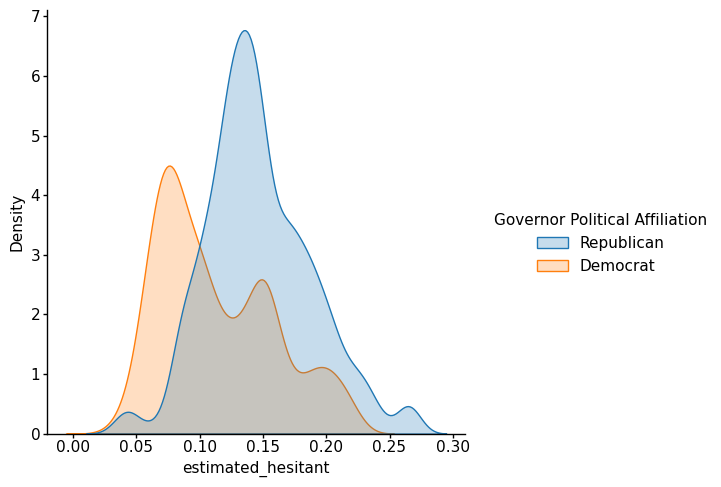

In [59]:
#p9.ggplot(polihes_df, p9.aes(x = 'estimated_hesitant', y = ..density.., fill = 'Governor Political Affiliation', color = 'Governor Political Affiliation' )) + p9.geom_density(alpha = 0.3)
sns.displot(data = polihes_df, x = "estimated_hesitant", hue ="Governor Political Affiliation", fill = True, kind = 'kde')